# 深層ニューラルネットの訓練

In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 勾配損失/爆発問題

In [6]:
def logit(z):
    return 1 / (1 + np.exp(-z))

[-5, 5, -0.2, 1.2]

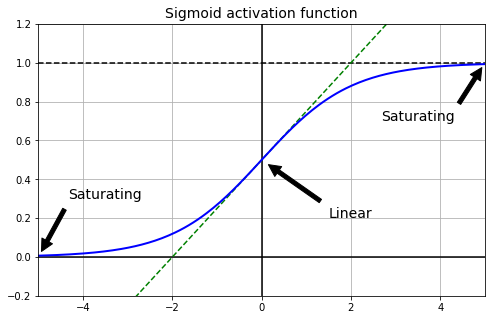

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(8, 5))

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

バックプロパゲーションは、出力層から入力層に向かって誤差勾配を伝える際、コスト関数を計算すると、勾配下降ステップに入ってから各パラメータを更新していく。
しかし、バックプロパゲーションが下の階層に進むに連れて勾配は緩やかになっていく。そのため、勾配下降による更新は、下の階層の接続の重みははとんど伝わらず、訓練はより良い解に収束しなくなる。これを`勾配損失`と呼ぶ。逆に勾配がどんどん急になり、層の重みの更新がとてつもなく大きくなり、アルゴリズムが発散してしまうことを`勾配爆発`と呼ぶ。

### Xavierの初期値とHeの初期値

In [9]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [12]:
he_init = tf.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, kernel_initializer=he_init, name='hedden1')

`tf.layers.dense()`デフォルトではXavierの初期値を使用している。`tf.variance_scaling_initializer()`を使用すればHeの初期値を使用できるようになる。